In [1]:
import pandas
import numpy

In [2]:
# Read the data
df = pandas.read_csv('sales_data.csv')
df.head()

,sales,date
0,112,2022-08-21
1,118,2022-08-22
2,132,2022-08-23
3,129,2022-08-24
4,121,2022-08-25


In [3]:
# date to datetime object
df['date'] = pandas.to_datetime(df['date'])

# date to index
df.set_index('date', inplace=True)


In [4]:
# general info about the data
df.info()

# check if there are any missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2022-08-21 to 2023-01-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


sales    0
dtype: int64

<AxesSubplot:xlabel='date'>

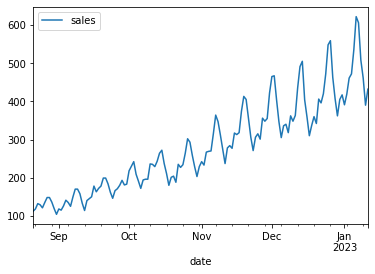

In [5]:
# plot the sales in a line chart
df.plot()

In [6]:
# create lagged features with 5 days lag
def create_lags():
    for i in range(1, 6):
        df['lag_' + str(i)] = df['sales'].shift(i)
    return df

df = create_lags()

In [7]:
# create rolling mean with 5, 10, 15, 20 days window
def create_rolling_mean():
    for i in [5, 10, 15, 20]:
        df['rolling_mean_' + str(i)] = df['sales'].shift().rolling(window=i).mean()
    return df

df = create_rolling_mean()

In [8]:
# drop all the missing values
df.dropna(inplace=True)

In [9]:
# split the data into train and test with in-built function
from sklearn.model_selection import train_test_split

X = df.drop('sales', axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [13]:
# shape X_train and X_test
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

30/30 [==============================] - 0s 3ms/step


39.2826416015625

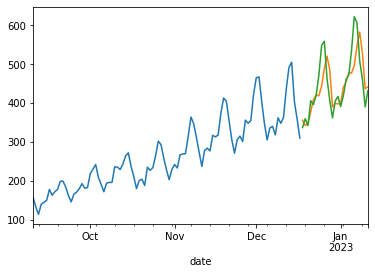

In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error
import numpy as np

# create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

# fit the model
history = model.fit(X_train, y_train, epochs=100, verbose=0, batch_size=32)

# predict for multiple days ahead at the same time
days_ahead = 30
y_pred = model.predict(X_test, steps=days_ahead)

# plot the train set and y_pred and y_test
y_train.plot()
pandas.Series(y_pred[:,0], index=y_test.index).plot()
y_test.plot()

# calculate the mean absolute error
mean_absolute_error(y_test, y_pred[:,0])


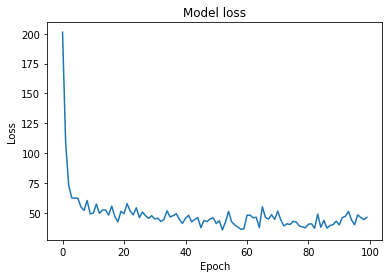

In [43]:
# plot convergence
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()